
# Project: To find out whether a country with the highest GDP per capita and population growth would host more refugees as opposed to the lowest. 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project will find out if a country with the highest GDP per capita would have a higher percentage of refugees. The notion is a country that is wealthier would have the necessary resources and fund to host as many refugees that the one that has the lowest GDP per capita. This analysis will not be a comprehensive one as GDP per capita depends on a number of factors including population size. 

> For this project, I will be including three indicators; population growth, refugees by percentage* and GDP per capita. I will be focusing on three countries which I will choose based on the lowest, middle and highest GDP per capita in the year 2017. The focus year is 2017 to simplify the research. All data will be extracted from Gapminder.com.

>NOTE*: the percentage of refugees in a host country abroad. This data tells us about refugees living outside of their home country.

In [882]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [883]:
refugee_number = pd.read_csv('refugee_in_perc_wb.csv')
refugee_number.set_index('Country', drop = True, inplace= True)

gdp_per_capita = pd.read_csv('income_per_person_gdp.csv')
gdp_per_capita.set_index('Country', drop = True, inplace= True)

population_growth = pd.read_csv('population_growth_annual_percent.csv')
population_growth.set_index('country', drop = True, inplace = True)


In [884]:
population_growth.info(), gdp_per_capita.info(), refugee_number.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1960    191 non-null    float64
 1   1961    192 non-null    float64
 2   1962    192 non-null    float64
 3   1963    192 non-null    float64
 4   1964    192 non-null    float64
 5   1965    192 non-null    float64
 6   1966    192 non-null    float64
 7   1967    192 non-null    float64
 8   1968    192 non-null    float64
 9   1969    192 non-null    float64
 10  1970    192 non-null    float64
 11  1971    192 non-null    float64
 12  1972    192 non-null    float64
 13  1973    192 non-null    float64
 14  1974    192 non-null    float64
 15  1975    192 non-null    float64
 16  1976    192 non-null    float64
 17  1977    192 non-null    float64
 18  1978    192 non-null    float64
 19  1979    192 non-null    float64
 20  1980    192 non-null    float64
 21  1981    192 non-null    float

(None, None, None)

There are some missing data and they will be fixed in the cleaning process next.

### Data Cleaning 

In [885]:
refugee_number.drop(refugee_number.loc[:,:'2016'].columns, axis = 1, inplace= True)
refugee_number.drop(['2018'], axis = 1, inplace = True)

In [886]:
gdp_per_capita.drop(gdp_per_capita.loc[:,:'2016'].columns, axis = 1, inplace= True)
gdp_per_capita.drop(gdp_per_capita.loc[:, '2018':].columns, axis = 1, inplace= True)

In [887]:
population_growth.drop(population_growth.loc[:,:'2016'].columns, axis = 1, inplace= True) 

In [888]:
gdp_per_capita.head()

,2017
Country,
Afghanistan,1760
Albania,11800
Algeria,13900
Andorra,49800
Angola,6040


As mentioned in the introduction, the analysis will be on the data in the year 2017. This is just to simplify the project. I have removed all other years using the slicing method. As seen the output, only data in one year for each indicator will be analysed.

In [889]:
(refugee_number.duplicated().sum().sum(), gdp_per_capita.duplicated().sum().sum(), population_growth.duplicated().sum().sum())

(38, 16, 27)

There are duplicates. However, after a close examination of the Excel sheet, I found the 'duplicated' data are not duplicated. Most were rounded off to 2 decimals but the other to 3 decimals. When I kept the numbers constant to 3 decimals, the 'duplicated' data did not alter. In any case, the duplicated data will not be removed.  

In [890]:
(refugee_number.isna().sum().sum(), gdp_per_capita.isna().sum().sum(), population_growth.isna().sum().sum())

(0, 0, 1)

In [891]:
population_growth.dropna(inplace= True)

In [892]:
population_growth.isna().sum().sum()

0

All NaN removed. The next steps will be to decide the three countries for analysis. They will be chosen based on their GDP per capita.

In [893]:
gdp_per_capita.describe()

,2017
count,193.000000
mean,18172.699482
std,19393.559289
min,627.000000
25%,3650.000000
50%,11700.000000
75%,26400.000000
max,113000.000000


In [894]:
# To determine the country with the lowest, highest and median GDP per capita:
gdp_countries = gdp_per_capita[gdp_per_capita['2017'].isin(["627", "113000", "11700"])]

In [895]:
gdp_countries

# So the three countries are as follow:

,2017
Country,
Qatar,113000
Somalia,627
Sri Lanka,11700


In [896]:
refugee = refugee_number.loc[['Somalia', 'Qatar', 'Sri Lanka']]
refugee.rename(columns = {'2017': 'Refugee'}, inplace=True)

population = population_growth.loc[['Somalia', 'Qatar', 'Sri Lanka']]
population.rename(columns = {'2017': 'Population'}, inplace = True)

gdp = gdp_countries.loc[['Somalia', 'Qatar', 'Sri Lanka']]
gdp.rename(columns = {'2017': 'GDP'}, inplace = True)

mean_gdp = gdp_per_capita.mean()
meanGDP = mean_gdp.to_frame().T

I used the location method to find the three countries in each indicator i.e. refugee percentage, population growth and GDP per capita. I have then renamed all the indicated above.
I had an initial idea of using the mean GDP per capita as a gauge (dependent). I have managed to create a separate dataframe for the mean but I got into a pickle while plotting the graphs.

In [897]:
total = gdp.join([refugee, population])

In [898]:
total

,GDP,Refugee,Population
Country,,,
Somalia,627,0.09980,2.92
Qatar,113000,0.00690,2.67
Sri Lanka,11700,0.00388,1.13


The idea is to amalgamate the indicators as one table to simplify plotting later.

<a id='eda'></a>
## Exploratory Data Analysis

### How do the countries fare when they are compared based on the indicators?

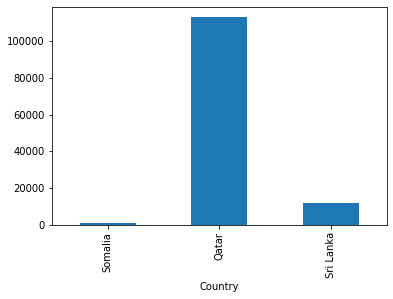

In [899]:
total['GDP'].plot.bar();


Based on the visual above, it tells me that Qatar's GDP per capita is signifcantly higher than the other two countries. Sri Lanka and Somalia have GDP per capita, collectively, under 20000, while Qatar's shoot overs. 

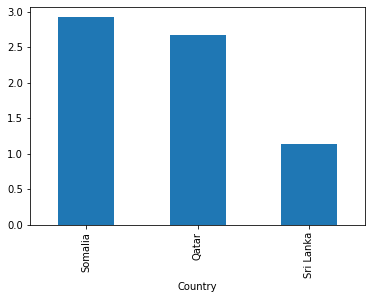

In [900]:
total['Population'].plot.bar();

Somalia has a higher population growth than Qatar. Sri Lanka has the least. But the growth between Qatar and Somalia are not far from each other.

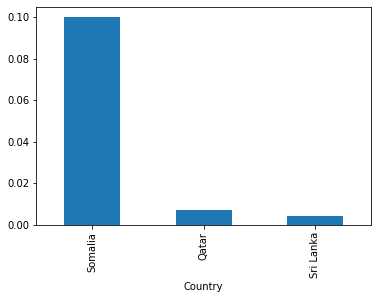

In [901]:
total['Refugee'].plot.bar();

I was taken aback when I saw this graph. Somalia has the least GDP per capita but its percentage of refugees is the highest as compared to Qatar's, which has the highest amongst countries. Sri Lanka has the least share. A least wealthy country has hosted the most refugees.

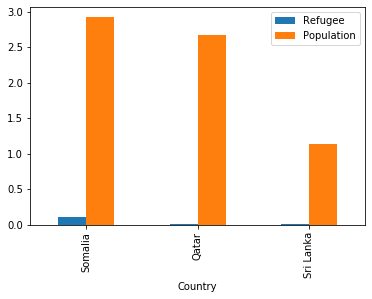

In [902]:
total.plot.bar(y = ['Refugee', 'Population']);

I have plotted this to see side by side, the refugee percentage and population growth, to see the magnitude of the latter when compared to the former. 

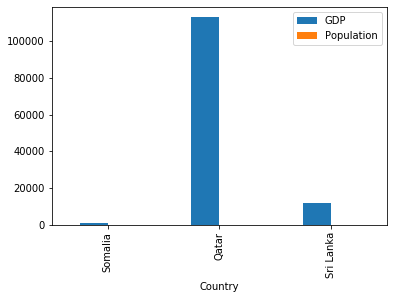

In [903]:
total.plot.bar(y = ['GDP', 'Population',]);

Because the values for GDP is just too great as compared to the population growth, one cannot see its values on the graph.

### Do richer country host more refugees? Do country that has the least population growth take in more refugees to mitigate the effect of declining population? 

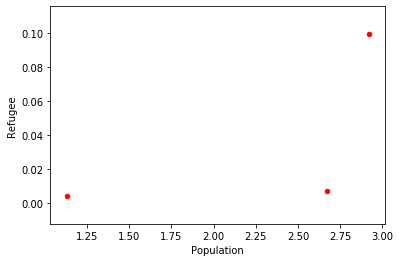

In [904]:
total.plot(kind='scatter',x='Population',y='Refugee',color='red')
plt.show()

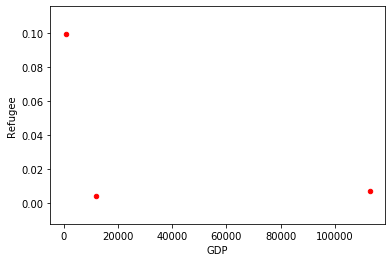

In [905]:
total.plot(kind='scatter',x='GDP',y='Refugee',color='red')
plt.show()

The country that has the least population is taking in fewer refugees. As confirmed in the bar chart above, Somalia that has the most growth has the most percentage of refugees. I would imagine countries like Qatar and Sri Lanka that the least population growth and higher GDP per capita would consider taking in more refugees. 

<a id='conclusions'></a>
## Conclusions

> The countries that have least population growth have fewer refugees. The countries that have lower GDP per capita have hosted the most percentage of refugees. The wealthiest country has fewer refugees. This finding tells that the country that has the highest GDP per capita has the fewest number of refugees.

>Limitation: Ideally, the mean GDP should be incorporated to see where these countries stand when compared to the mean. 